In [1]:
import numpy as np
import pandas as pd
import math

from matplotlib import pyplot as plt

In [2]:
arr = pd.read_csv("Polynomialdata_train.csv")
arr1=arr.sample(frac=1)

x=arr.drop(['target'],axis=1)
y=arr['target']

In [3]:
# @title normalisation
def normalise(x):
    """
    x= array(m,n) = trainig set m= no of examples, n= no.of features
    mu (ndarray (n,))     : mean of each feature
        sigma (ndarray (n,))  : standard deviation of each feature
    """
    n=np.shape(x[1:][0])
    mu = np.mean(x, axis=0)
    sigma = np.std(x, axis=0)+1e-10
    x_normalised= (x-mu)/sigma
    return x_normalised,mu,sigma


In [4]:
x_train1=x.to_numpy()
y_train1=y.to_numpy()

In [5]:
X_t = x_train1
Y_train = y_train1[:40000]

Y_cv=y_train1[40000:]
X_cv=X_t[40000:]
X_train=X_t[:40000]
print(X_train.shape)

(40000, 3)


In [6]:
def combinations_with_replacement(iterators,degree):
 
    if degree==0:
        return [[]]
    if not iterators or degree < 0:
        return [[]]  
    answer=[]
    
    if iterators[0]==0:
        for i in range(degree+1):
            combi=np.zeros(i,)
            deg_temp=degree-i
            sublist=combinations_with_replacement(list(range(1,(iterators[-1]+1))),deg_temp)
            for j in range(len(sublist)):
                answer.append(np.append(combi,sublist[j]))
    elif iterators[0]==1:
        for i in range(degree+1):
            combi=np.ones(i,)
            deg_temp=degree-i
            sublist=combinations_with_replacement([2],deg_temp)
            for j in range(len(sublist)):
                answer.append(np.append(combi,sublist[j]))
    elif iterators[0]==2:
        answer.append(np.ones(degree,)+1)
    return answer

In [7]:
def create_polynomial(degree, X):

    num_samples, num_features = X.shape
    combinations =combinations_with_replacement(list(range(num_features)), degree)
    result = np.empty((num_samples, 0))
    for indices in combinations:
        
        arr=np.ones(X.shape[0],)
        for i in range(indices.shape[0]):
            
            arr=arr*X[:,int(indices[i])]
        result = np.hstack((result, arr.reshape(-1,1)))
    return result

In [8]:
def poly(X_train,degree):
    X_fin=np.empty((X_train.shape[0],0))
    for i in range(degree):
        X_fin=np.concatenate([X_fin,create_polynomial(i+1,X_train)],axis=1)
    return X_fin

In [9]:
X_fin=poly(X_train,6)

X_fin.shape


(40000, 83)

In [10]:
# @title cost
def cost(x,y,w,b):
    """
    x= array(m,n) = trainig set m= no of examples, n= no.of features
    y= array(m)= array containing actual lables
    w= array(n)= feature weights
    _lambda=regularisation consatant
    b= bias"""

    m=x.shape[0]
    label_pre = np.dot(x,w)+b #array containing predicted lables

    unsq_cost =( label_pre.flatten() - y)/np.sqrt(m) #array containg unsquared cost of each example
    sq_cost = np.square(unsq_cost) #squared cost of each element
    cost = np.sum(sq_cost)
    cost = cost/2
    cost = cost


    return cost



In [11]:
# @title regularised cost
def reg_cost(x,y,w,b,_lambda):
    m=x.shape[0]
    ser_reg=np.square(w)/np.sqrt(m)  #array of squared weights for regulartsation
    reg_cost=np.sum(ser_reg) #regularised cost
    reg_cost=_lambda*reg_cost
    
    reg_cost=reg_cost/2

    total_cost = reg_cost + cost(x,y,w,b)
    return total_cost

In [12]:
# @title gradient
def gradient(x,y,w,b,_lambda):
    """
    x= array(m,n) = trainig set m= no of examples, n= no.of features
    y= array(m)= value
    w= array(n)= feature weights
    b= bias
    df_dw: array(n)= derivative of cost wrt weights
    df_db = derivative of cost wrt bias b
    """
    m= x.shape[0]
    n=x.shape[1:][0]

    label_pre = np.dot(x,w)+b #array containing predicted lables
    
    unsq_cost = label_pre.flatten() - y #array containg unsquared cost of each example
    
    df_db = np.sum(unsq_cost) #sum of cost
    df_db = df_db/m
    unsq_cost1 = np.reshape(unsq_cost,(1,-1))   #reshaping the array to (1,m)
    
    df_dw = np.dot(unsq_cost1,x)
    
    df_dw= df_dw.T + _lambda*w
    

    df_dw = df_dw/m
    return df_db, df_dw


In [13]:
# @title gradient descent
def gradient_descent(x,y,w,b,itr_nos,alpha,_lambda):
    """
    x= array(m,n) = trainig set m= no of examples, n= no.of features
    y= array(m)= value
    w= array(n)= feature weights
    b= bias
    itr_nos = no of iterations
    alpha = learning rate
    """
    m= x.shape[0]
    n=x.shape[1:][0]
    J_log = np.zeros(itr_nos)

    for i in range(itr_nos):
        for j in range(1250):
            x_t=x[32*j:32*(j+1)]
            y_t=y[32*j:32*(j+1)]
            df_db, df_dw = gradient(x_t,y_t,w,b,_lambda)
            b=b-alpha*df_db

            w = w-alpha*df_dw

        J_log[i]= J_log[i]+ cost(x,y,w,b,)

        if i% math.ceil(itr_nos/10) == 0 :
            print(f"itr.no={i:4d}, cost={reg_cost(x,y,w,b,_lambda)}")

    return w,b,J_log


In [14]:
# @title test

n=np.shape(X_fin[1:][0])
w_initial = np.random.randn(n[0],1)
print(n)
b_initial = 0
alpha=1e-3
iterations = 5000
Xx,mu,sigma=normalise(X_fin)
_lambda = 0

w,b,J_log = gradient_descent(Xx,Y_train,w_initial,b_initial,iterations,alpha,_lambda)
   

(83,)
itr.no=   0, cost=4429645281981.71
itr.no= 500, cost=988444.4126321591
itr.no=1000, cost=14.581010741322386
itr.no=1500, cost=0.00027040792719270246
itr.no=2000, cost=5.313620723900918e-09
itr.no=2500, cost=7.192507637644043e-14
itr.no=3000, cost=4.070111701898364e-16
itr.no=3500, cost=4.040089942199936e-16
itr.no=4000, cost=4.047822921867978e-16
itr.no=4500, cost=4.041403435799778e-16


In [15]:
predic=np.dot(Xx,w)+b
predic[:10]

array([[4.13152828e+06],
       [3.17297482e-01],
       [4.67642163e+04],
       [1.40417483e+05],
       [4.78898764e+03],
       [1.75719419e+01],
       [5.90902032e+04],
       [5.96205054e+06],
       [1.04458018e+00],
       [4.38821016e+00]])

In [16]:
J_log[-1]

4.051845314683197e-16

In [17]:

def r2_score(actual,predicted):
    mean_actual = np.mean(actual)   
    ss_t = np.sum((actual - mean_actual)**2)   
    ss_r = np.sum((actual - predicted.flatten())**2)
    r2_score = 1 - (ss_r / ss_t)
    return r2_score


In [18]:
r2_score(Y_train,predic)

1.0

In [19]:
X_cvnorm=(poly(X_cv,6)-mu)/sigma
r2_score(Y_cv,np.dot(X_cvnorm,w)+b)

1.0

In [21]:
r2_score(Y_train,predic)

1.0

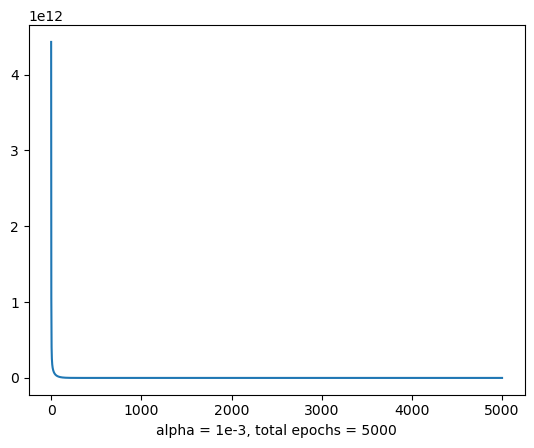

In [22]:
plt.plot(J_log)
plt.xlabel("alpha = 1e-3, total epochs = 5000")
plt.show()

In [23]:
Xs=X_t**2
X3=np.power(X_t,3)

<function matplotlib.pyplot.show(close=None, block=None)>

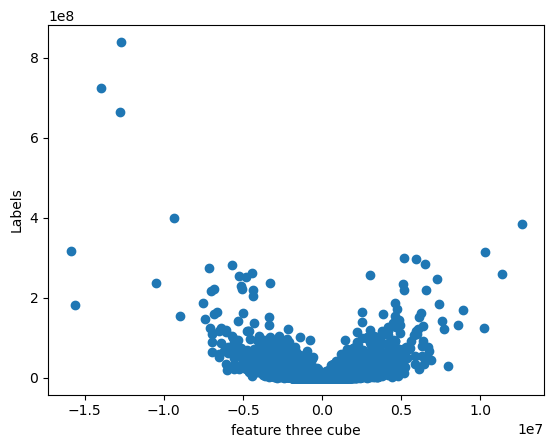

In [24]:
plt.scatter(X3[:,2],y_train1)
plt.ylabel("Labels")
plt.xlabel("feature three cube")
plt.show

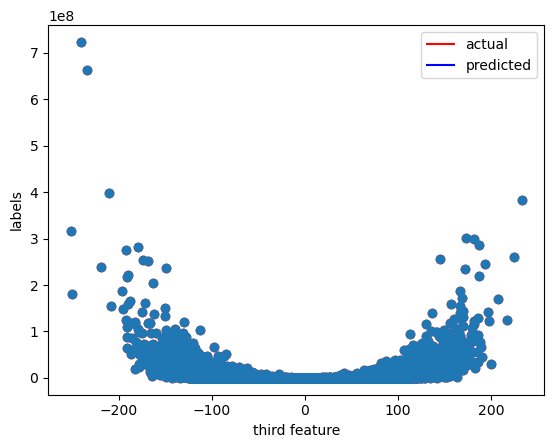

In [25]:

plt.scatter(X_train[:,2],Y_train,color="red")
plt.scatter(X_train[:,2],predic)
plt.xlabel("third feature")
plt.ylabel("labels")
legend_labels={
    "actual" : "red",
    "predicted":"blue"
}
handles = [plt.Line2D([0], [0], color=color, label=label) for label, color in legend_labels.items()]
plt.legend(handles=handles)
plt.show()